# binary classifier with the Sarcasm Dataset

[News Headlines Dataset for Sarcasm Detection](https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection/home) 

In [1]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2022-07-09 14:10:57--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 2607:f8b0:4007:809::2010, 2607:f8b0:4007:817::2010, 2607:f8b0:4007:814::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2607:f8b0:4007:809::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  3.04MB/s    in 1.8s    

2022-07-09 14:10:59 (3.04 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [2]:
import json

# Load the JSON file
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

# Initialize the lists
sentences = []
labels = []

# Collect sentences and labels into the lists
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [10]:
print(f'the label of "{sentences[0]}" is {labels[0]}')

the label of "former versace store clerk sues over secret 'black code' for minority shoppers" is 0


In [11]:
# Number of examples to use for training
training_size = 20000

# Vocabulary size of the tokenizer
#vocab_size = 10000
vocab_size = 1000

# Maximum length of the padded sequences
max_length = 32
#max_length = 16

# Output dimensions of the Embedding layer
#embedding_dim = 16
embedding_dim = 64

In [13]:
# Split the sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [14]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters for padding and OOV tokens
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [15]:
np.shape(training_padded)

(20000, 32)

In [18]:
import tensorflow as tf

# # Initialize a GlobalAveragePooling1D (GAP1D) layer
# gap1d_layer = tf.keras.layers.GlobalAveragePooling1D()

# # Define sample array
# sample_array = np.array([[[10,2],[1,3],[1,1]]])

# # Print shape and contents of sample array
# print(f'shape of sample_array = {sample_array.shape}')
# print(f'sample array: {sample_array}')

# # Pass the sample array to the GAP1D layer
# output = gap1d_layer(sample_array)

# # Print shape and contents of the GAP1D output array
# print(f'output shape of gap1d_layer: {output.shape}')
# print(f'output array of gap1d_layer: {output.numpy()}')

In [19]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    #tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24, activation='relu'),
    #tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 64)            64000     
                                                                 
 global_average_pooling1d_1   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense (Dense)               (None, 24)                1560      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 65,585
Trainable params: 65,585
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
num_epochs = 30

# Train the model
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 1s - loss: 0.5323 - accuracy: 0.7231 - val_loss: 0.4155 - val_accuracy: 0.8052 - 1s/epoch - 2ms/step
Epoch 2/30
625/625 - 1s - loss: 0.3811 - accuracy: 0.8253 - val_loss: 0.3988 - val_accuracy: 0.8171 - 748ms/epoch - 1ms/step
Epoch 3/30
625/625 - 1s - loss: 0.3644 - accuracy: 0.8315 - val_loss: 0.4005 - val_accuracy: 0.8126 - 672ms/epoch - 1ms/step
Epoch 4/30
625/625 - 1s - loss: 0.3588 - accuracy: 0.8353 - val_loss: 0.4034 - val_accuracy: 0.8143 - 722ms/epoch - 1ms/step
Epoch 5/30
625/625 - 1s - loss: 0.3546 - accuracy: 0.8382 - val_loss: 0.4062 - val_accuracy: 0.8101 - 685ms/epoch - 1ms/step
Epoch 6/30
625/625 - 1s - loss: 0.3536 - accuracy: 0.8381 - val_loss: 0.4025 - val_accuracy: 0.8117 - 814ms/epoch - 1ms/step
Epoch 7/30
625/625 - 1s - loss: 0.3505 - accuracy: 0.8411 - val_loss: 0.4063 - val_accuracy: 0.8098 - 692ms/epoch - 1ms/step
Epoch 8/30
625/625 - 1s - loss: 0.3479 - accuracy: 0.8418 - val_loss: 0.4034 - val_accuracy: 0.8149 - 707ms/epoch - 1ms/step
Epo

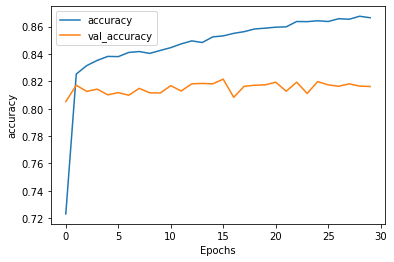

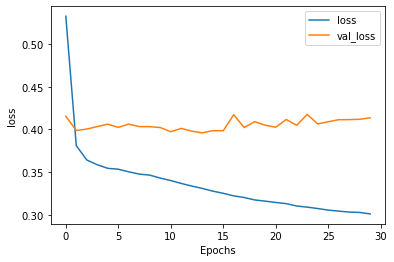

In [22]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [23]:
# Get the index-word dictionary
reverse_word_index = tokenizer.index_word

# Get the embedding layer from the model (i.e. first layer)
embedding_layer = model.layers[0]

# Get the weights of the embedding layer
embedding_weights = embedding_layer.get_weights()[0]

# Print the shape. Expected is (vocab_size, embedding_dim)
print(embedding_weights.shape) 


(1000, 64)


In [24]:
import io

# Open writeable files
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

# Initialize the loop. Start counting at `1` because `0` is just for the padding
for word_num in range(1, vocab_size):

  # Get the word associated at the current index
  word_name = reverse_word_index[word_num]

  # Get the embedding weights associated with the current index
  word_embedding = embedding_weights[word_num]

  # Write the word name
  out_m.write(word_name + "\n")

  # Write the word embedding
  out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")

# Close the files
out_v.close()
out_m.close()

In [25]:
# files.download('vecs.tsv')
# files.download('meta.tsv')